 <font size = +2><center><u>Home Renovation and House Sales in King County</u></center></font>

Authors: Roshni Janakiraman, Mike and Jose Castillo

<hr> 
</hr>

# Business Case

* As a Construction Consulting firm, Royal Advisory helps new home renovation businesses establish themselves in the Seattle market.
 <br>  
  
  * With the housing market is cooling rapidly in Seattle, homeowners are increasingly opting to invest in remodeling their current home instead of buying new properties. Given this [increase in demand](https://www.king5.com/article/money/markets/real-estate/seattle-home-renovation-housing-cooldown/281-71cb28a8-1bd5-4187-955f-debad072fe53), now is the perfect time for a home renovation company to move into the Seattle area. 
  
  <br>  
  
* A new home renovation company, Home Remedies, hired us to recommend the best services to offer clients who are looking to increase the sale value of their homes. 

## Types of Remodeling Projects

 * First, based on [industry definitions](https://www.homeadvisor.com/cost/additions-and-remodels/), we identifed three major components of home remodeling projects:
     1. **Home Renovations:** Updating the quality of the house's building material
     <br>
     
     2. **Home Remodeling:** Increasing the size of your home, either through extensions or additions:  
         2a. *Home Extensions:* Increasing the size of existing section of the house <br>
         2b. *Home Additions:* Adding a new section to your home <br>  
         <br>
     
 * We were then guided by these business questions:

## Business Questions

1. For all clients interested in home remodeling (increasing the area of your house, either through *home extensions* or *home additions*, where are the best areas to add square footage?
    - Which areas of the house is increased area associated with increased sale value?
    - Our model included these common home spaces: Above-Ground Living Space (e.g. rooms, kitchen, hallways), Basement, Garage, Patio, Yard
    <br> 
    
    
2. For clients specifically interested in *home additions*, what are the best structures to add to increase the sale value of their house?
    - What types of home additions contribute to a higher sale price?
    <br>
    

3. How much do renovations contribute to the sale price of a house? Should clients add build quality renovation projects to their home remodeling projects to increase their house's value?

## Data Source & Relevance to Business Case

* The dataset consists of data from all 2021 house sales in King County (n = 30155).

* As a Seattle-based company, Home Remedies needs to understand the sale trends in the Seattle/King County area.

* Current data allows us to see what *features of a house* contributed to house sale price in 2021
   * From this, we can infer what types of house changes could increase future house sale price

## Why Linear Regression Models?

* Regression coefficients allow us to see how the different parts affect the whole.
* Each of these factors influence each other and change what their true effect is.
* This is where regression is useful: regression tells you how much each quality contributes to value– so you know what qualities to prioritize searching for in a potential investment.
* Not only can we directly compare different variables, but also, we can see what combinations of variables allow us to achieve the desired result (highest sale price)

***


# Data Preparation

## Import Packages & Data

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

%matplotlib inline

In [280]:
# Function used to format graph numbers

def format_number(data_value,indx):
    if data_value >= 1000000:
        formatter = '{:1.1f}M'.format(data_value * 0.000001)
    else:
        formatter = '{:1.1f}K'.format(data_value * 0.001)
    return formatter

In [2]:
# Collect entire data 

data = pd.read_csv('data/kc_house_data.csv')

## Exploring Variables in Dataset

In [3]:
# Checkout all data columns & spot Null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

## Identifying Features of Interest to Answer Current Questions

### Features of Interest based on Questions:

 * **Remodeling** *(increasing area of house, either by extending existing space or adding new space)*:
    1. Living Space (Total Living Space: Space physically within the "house")
        * Above-Ground Living Space (sqft_above)
        * Basement (sqft_basement)
    2. Garage Space (sqft_garage)
    3. Patio Space (sqft_patio)
    4. Yard Space (sqft_yard; will calculate from given variables)  
    
    
 * **Addition** *(adding a new room/section to house)*:
    1. Number of Bathrooms
    2. Number of Bedrooms
    3. Has Garage (binary calculated from sqft_garage: yes/no)
    4. Has Patio (binary calculated from sqft_patio: yes/no)
    

 * **Renovation** *(upgrading building quality)*:
    1. Grade


### Columns to Exclude

* First, we excluded variables that a home remodeling company *could not change* -- not useful information for our client


* Second, we excluded the "Condition and sqft_living" variable
    * Condition 
        * [King County Glossary](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r): "Condition is relative to age and grade"
        * Would repeat the effect of one of our key variables (grade)
        * Since grade refers to "construction build and quality," it is more relevant to our client
    * Sqft_living 
        * Sqft_living = sqft_above + sqft_basement
        * Removed because sqft_above + sqft_basement more specifically answer question
        

* Third, we excluded Heat Source & Sewer System variables because they are outside of the scope of the services Home Remedies can offer. Home Remedies generally refers clients who are interested in such projects to external Energy Consultants or Plumbers.

In [5]:
# Dropping columns not related to current questions/analyses

df = data.drop(['id', 'date', 'view', 'waterfront', 'greenbelt', 'nuisance', 'sqft_living',
                'condition', 'yr_built','yr_renovated', 'heat_source', 'sewer_system','address', 'lat', 'long'], axis=1)

### Calculating Features of Interest not yet present in dataset

Yard Space: calculating based on [architect definitions](https://www.yourownarchitect.com/what-is-the-difference-between-floor-area-and-lot-area/) and [Seattle permit regulations](https://www.seattle.gov/DPD/Publications/CAM/cam220.pdf)

Yard Space = Lot Space - Ground Floor Living Space

We can estimate this by dividing the above ground living space by the number of floors 

In [6]:
df['sqft_yard'] = df['sqft_lot'] - ((df['sqft_above']/round(df['floors'])))

#There are 15 entries where yard space is negative. Since this is impossible, we will replace these values with 0.
df['sqft_yard'].mask(df['sqft_yard']<0, 0, inplace=True)

df['sqft_yard'].describe()

count    3.015500e+04
mean     1.552185e+04
std      6.030965e+04
min      0.000000e+00
25%      3.692500e+03
50%      6.220000e+03
75%      9.232500e+03
max      3.253082e+06
Name: sqft_yard, dtype: float64

We can now drop floors and sqft_lot from our dataset, since we do not use them further:

In [7]:
df.drop(['floors', 'sqft_lot'], axis=1, inplace=True)

Presence of Basement/Garage/Patio: binary variables (Y/N)

* For the house additions analysis, we want to compare houses that have these features compared to houses that do not. 
For garage and patio, we need to derive this information from the sq_ft variable:

In [8]:
# Changing basement, patio, and garage to binary
# 1 (YES) the property has one or 0 (NO) the property does not have one

df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['has_garage'] = df['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
df['has_patio'] = df['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'sqft_yard',
       'has_basement', 'has_garage', 'has_patio'],
      dtype='object')

## Cleaning Variables

In [10]:
#For graph visibility, making Grade into a new, numeric-only variable (grade_num)

orig_grade_val = list(df['grade'].value_counts().sort_index(ascending=False).index)
orig_grade_val
new_grade_val = [9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1]

df['grade_num'] = df['grade'].replace(orig_grade_val, new_grade_val)

In [11]:
# Might be helpful to have a grade_dict matching num to definition

grade_dict = {new_grade_val[i]: orig_grade_val[i].strip('0123456789.- ') for i in range(len(new_grade_val))}

grade_dict
df['grade'] = df['grade_num']

In [12]:
df.drop('grade_num', axis=1, inplace=True)

## Initial Descriptive Statistics

In [13]:
df.describe(include='all')

,price,bedrooms,bathrooms,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,sqft_yard,has_basement,has_garage,has_patio
count,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,7.651368,1809.826098,476.039396,330.211142,217.412038,1.552185e+04,0.486951,0.668082,0.775825
std,8.963857e+05,0.981612,0.889556,1.148978,878.306131,579.631302,285.770536,245.302792,6.030965e+04,0.499838,0.470910,0.417045
min,2.736000e+04,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,6.480000e+05,3.000000,2.000000,7.000000,1180.000000,0.000000,0.000000,40.000000,3.692500e+03,0.000000,0.000000,1.000000
50%,8.600000e+05,3.000000,2.500000,8.000000,1560.000000,0.000000,400.000000,150.000000,6.220000e+03,0.000000,1.000000,1.000000
75%,1.300000e+06,4.000000,3.000000,8.000000,2270.000000,940.000000,510.000000,320.000000,9.232500e+03,1.000000,1.000000,1.000000
max,3.075000e+07,13.000000,10.500000,13.000000,12660.000000,8020.000000,3580.000000,4370.000000,3.253082e+06,1.000000,1.000000,1.000000


**Variable Breakdown:**

**Outcome:** price <br>
**Categorical (Ordinal) Variables:** bedrooms, bathrooms, grade <br>
**Binary Variables:** has_garage, has_patio <br>
**Continuous Variables:** sqft_living, sqft_above, sqft_basement, sqft_garage, sqft_patio, sqft_yard

### Categorical Variables

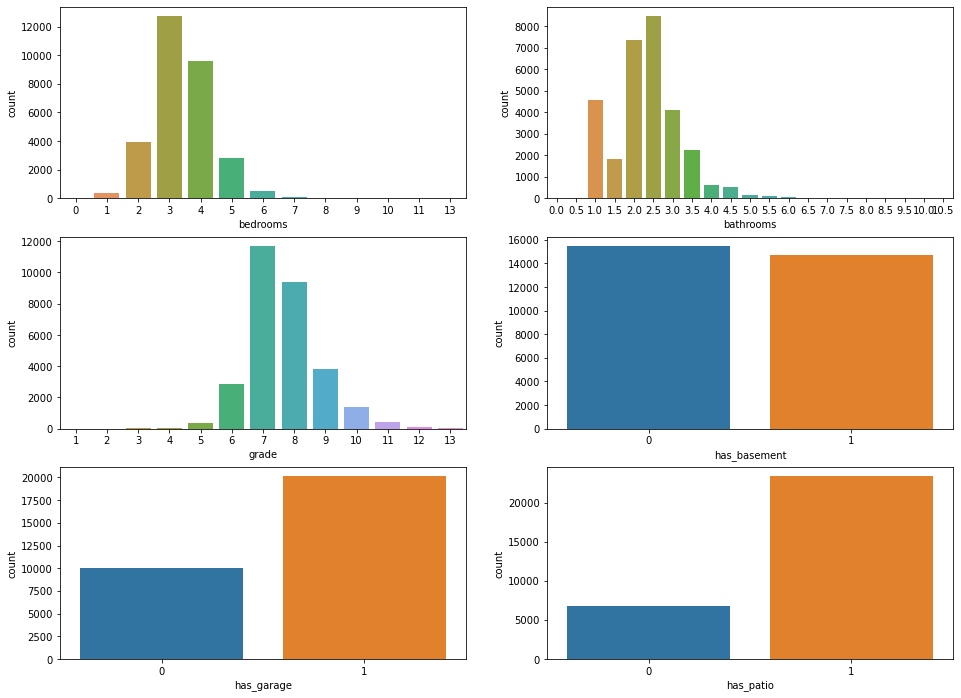

In [14]:
cat = ['bedrooms', 'bathrooms', 'grade', 'has_basement','has_garage', 'has_patio']
df_cat = df[cat] 

fig, ax = plt.subplots(3, 2, figsize=(16,12))

for i, col in enumerate(df_cat.columns):
    x = i//2
    y = i%2
    sns.countplot(x=col, data=df_cat, ax=ax[x][y])

* Outliers in Bedrooms, Bathrooms, Grade -- need to exclude or combine categories

* Similar amount of houses that have basements compared to ones that do not

* Greater number of houses that have a garage or have a patio compared to ones that do not

### Continuous Variables (Outcome + Predictors)

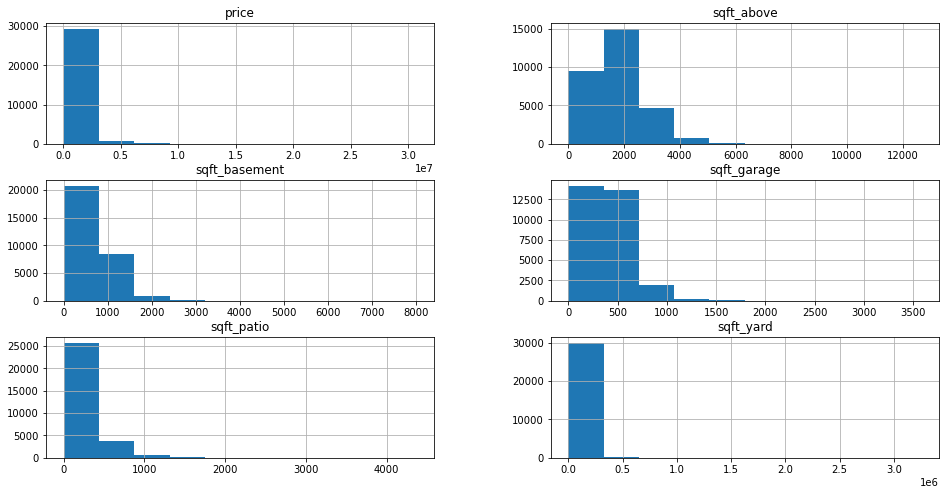

In [15]:
cont = ['price', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio','sqft_yard']

df[cont].hist(figsize=(16,8));

* All of these variables are heavily skewed right

* Options to consider:
1. Removing outliers
2. Transforming data

## Defining & Excluding Outliers

* We want to look at typical qualities of houses: only cases relevant to our client
    * Data indicates many outliers: 
        * Rare to encounter clients with houses fitting these cases
        * Even so, clients within the outliers are likely to have different goals/priorities than target audience

### Categorical Ordinal Variables: Dropping Outliers

* For all categorical ordinal variables (Bathroom, Bedroom, Floors, Grade): we excluded any group with n < 100.

In [16]:
df['bedrooms'].value_counts()

df = df[(df['bedrooms'] != 0) & (df['bedrooms'] < 7)]

df['bedrooms'].value_counts().sort_index()

1      391
2     3936
3    12754
4     9597
5     2798
6      498
Name: bedrooms, dtype: int64

In [17]:
df['bathrooms'].value_counts()

df = df[(df['bathrooms'] >= 1) & (df['bathrooms'] <= 5)]

df['bathrooms'].value_counts().sort_index()

1.0    4560
1.5    1807
2.0    7341
2.5    8470
3.0    4083
3.5    2256
4.0     616
4.5     518
5.0     135
Name: bathrooms, dtype: int64

In [18]:
df['grade'].value_counts() 
# Based on n < 100 rule, can exclude 1, 2, 3, 4, 12, 13

df = df[(df['grade'] > 4) & (df['grade'] < 12)]

df['grade'].value_counts().sort_index()


5       386
6      2847
7     11623
8      9339
9      3776
10     1300
11      361
Name: grade, dtype: int64

#### Condensing grade into 4 categories

After reviewing the King County definitions, we decided to combine similar grades into 4 categories, based on the similar language that each definition used. For the categories labeled as "High Quality," we used the label "Exceptional"

 * 5 & 6 = Below Average
 * 7 = Average
 * 8 & 9 = Above Average
 * 10 & 11 = Exceptional Quality
 

In [19]:
grade_old = [5,6,7,8,9,10,11]
grade_new = ['Below_Average', 'Below_Average', 'Average', 'Above_Average', 'Above_Average', 'Exceptional', 'Exceptional']

df['grade'] = df['grade'].replace(grade_old, grade_new)

df['grade'].value_counts()

df['grade']=pd.Categorical(df['grade'], ordered=True, categories=['Below_Average', 'Average', 'Above_Average','Exceptional'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29632 entries, 0 to 30154
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          29632 non-null  float64 
 1   bedrooms       29632 non-null  int64   
 2   bathrooms      29632 non-null  float64 
 3   grade          29632 non-null  category
 4   sqft_above     29632 non-null  int64   
 5   sqft_basement  29632 non-null  int64   
 6   sqft_garage    29632 non-null  int64   
 7   sqft_patio     29632 non-null  int64   
 8   sqft_yard      29632 non-null  float64 
 9   has_basement   29632 non-null  int64   
 10  has_garage     29632 non-null  int64   
 11  has_patio      29632 non-null  int64   
dtypes: category(1), float64(3), int64(8)
memory usage: 2.7 MB


### Continuous Variables: Dropping Outliers

* Outcome variable: Price 
* Continuous predictors: sqft_living, sqft_above, sqft_basement, sqft_garage, sqft_patio, sqft_yard

* Two options for outlier removal:
1. IQR Method: (Lower, Upper) = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)
2. Z Method: (Lower, Upper) = (z = -3), (z = 3)

* Because each variable is heavily skewed right, both options ended up removing >10% data from various columns

* We created functions to test what percent of data will be removed through each outlier method, and whether to proceed/try a new method:

#### Z Method: Percentage of Data to Remove Function

In [20]:
def z_method(orig_len, ref_df, cols):
    test_df = ref_df
    outliers_removed = []
    outliers_not_removed = []
    percent = (orig_len - len(ref_df))/orig_len*100
    
    for col in cols:
        test_df = ref_df[(ref_df[col] > np.percentile(ref_df[col], .25)) & (ref_df[col] < np.percentile(ref_df[col], 99.75))]
        percent_new_data = (orig_len-len(test_df))/orig_len*100
        
        if percent_new_data < 10:
            outliers_removed.append(col)
            ref_df = test_df
            percent = percent_new_data
        else:
            outliers_not_removed.append(col)
    
    print(f"Outliers were removed from {outliers_removed}, excluding {percent:.2f}% of the total data.")
    print(f"These columns still include outliers: {outliers_not_removed}.")
    print(f"Clean dataset: n = {len(ref_df)}")
    
    return ref_df, outliers_removed, outliers_not_removed


#### IQR Method: Percentage of Data to Remove Function

In [21]:
def iqr_method(orig_len, ref_df, cols):
    outliers_removed = []
    outliers_not_removed = []
    test_df = ref_df
    percent_sum = (orig_len - len(ref_df))/len(data)*100
    
    for col in cols:
        q1 = np.percentile(ref_df[col], [25])
        q3 = np.percentile(ref_df[col], [75])
        three_halves_iqr = 1.5*(q3 - q1)
        lower = int(q1 - three_halves_iqr)
        upper = int(q3 + three_halves_iqr)
        
        test_df = ref_df[(ref_df[col] < upper) & (ref_df[col] > lower)]
        percent_new_data = (orig_len-len(test_df))/orig_len*100
        
        if percent_new_data < 10:
            outliers_removed.append(col)
            ref_df = test_df
            percent = percent_new_data
        else:
            outliers_not_removed.append(col)
    
    print(f"Outliers were removed from {outliers_removed}, excluding {percent:.2f}% of the total data.")
    print(f"These columns still include outliers: {outliers_not_removed}.")
    print(f"Clean dataset: n = {len(ref_df)}")
    
    return ref_df, outliers_removed, outliers_not_removed

### Implementing Methods

In [22]:
cols = ['price', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'sqft_yard']

z_remove_outliers = z_method(len(data), df, cols)

df_new = z_remove_outliers[0]
removed_cols = z_remove_outliers[1]
not_removed_cols = z_remove_outliers[2]

Outliers were removed from ['price', 'sqft_above', 'sqft_yard'], excluding 3.24% of the total data.
These columns still include outliers: ['sqft_basement', 'sqft_garage', 'sqft_patio'].
Clean dataset: n = 29179


In [23]:
iqr_remove_outliers = iqr_method(len(data), df_new, not_removed_cols)

df_new_2 = iqr_remove_outliers[0]
removed_cols_2 = iqr_remove_outliers[1]
not_removed_cols_2 = iqr_remove_outliers[2]

Outliers were removed from ['sqft_basement', 'sqft_garage', 'sqft_patio'], excluding 7.27% of the total data.
These columns still include outliers: [].
Clean dataset: n = 27964


* Through this combination of the z-method and IQR-method, we were able to remove outliers from all of our continuous variables and drop less than 10% of our data!

* Setting df_new_2 as df:

In [24]:
df = df_new_2

len(df)

27964

## Descriptive Statistics of Cleaned Variables

In [25]:
df.describe(include='all')

,price,bedrooms,bathrooms,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,sqft_yard,has_basement,has_garage,has_patio
count,2.796400e+04,27964.000000,27964.000000,27964,27964.000000,27964.000000,27964.000000,27964.000000,27964.000000,27964.000000,27964.000000,27964.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Above_Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.029896e+06,3.380704,2.276498,NaN,1745.380203,454.271814,317.638821,181.405378,11558.824644,0.482406,0.668216,0.765627
std,6.178461e+05,0.907577,0.802473,NaN,774.650265,540.608355,263.929312,174.897253,29120.337782,0.499699,0.470862,0.423614
min,9.620500e+04,1.000000,1.000000,NaN,530.000000,0.000000,0.000000,0.000000,159.000000,0.000000,0.000000,0.000000
25%,6.399500e+05,3.000000,2.000000,NaN,1170.000000,0.000000,0.000000,40.000000,3580.000000,0.000000,0.000000,1.000000
50%,8.499700e+05,3.000000,2.500000,NaN,1523.000000,0.000000,380.000000,140.000000,6062.500000,0.000000,1.000000,1.000000
75%,1.250000e+06,4.000000,2.500000,NaN,2190.000000,920.000000,500.000000,290.000000,8700.750000,1.000000,1.000000,1.000000


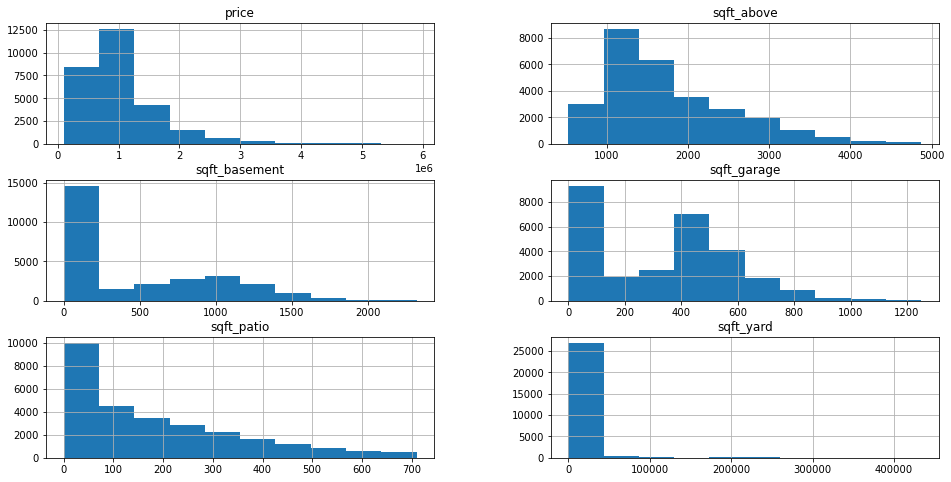

In [26]:
df[cols].hist(figsize=(16,8));

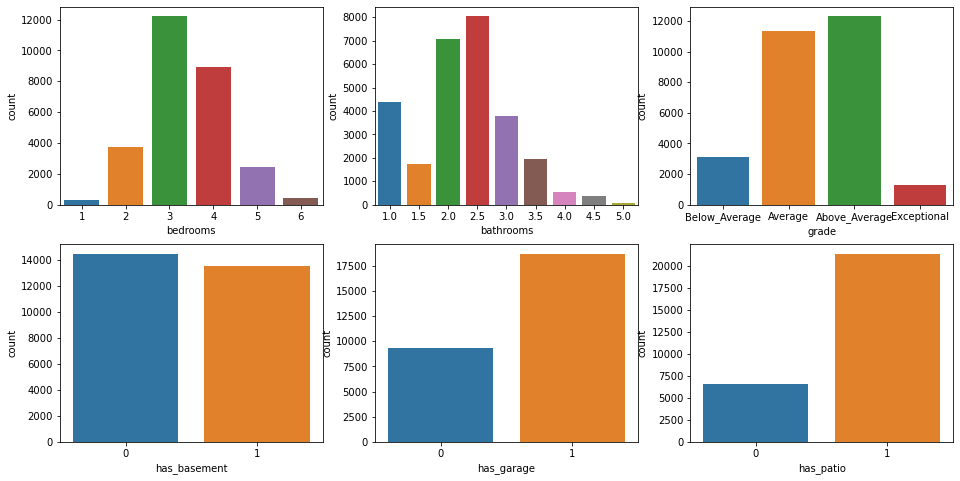

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))

for i, col in enumerate(df_cat.columns):
    x = i//3
    y = i%3
    sns.countplot(x=col, data=df, ax=ax[x][y])

# Initial Visualization

## Pair Plots - Price and X Variables

11


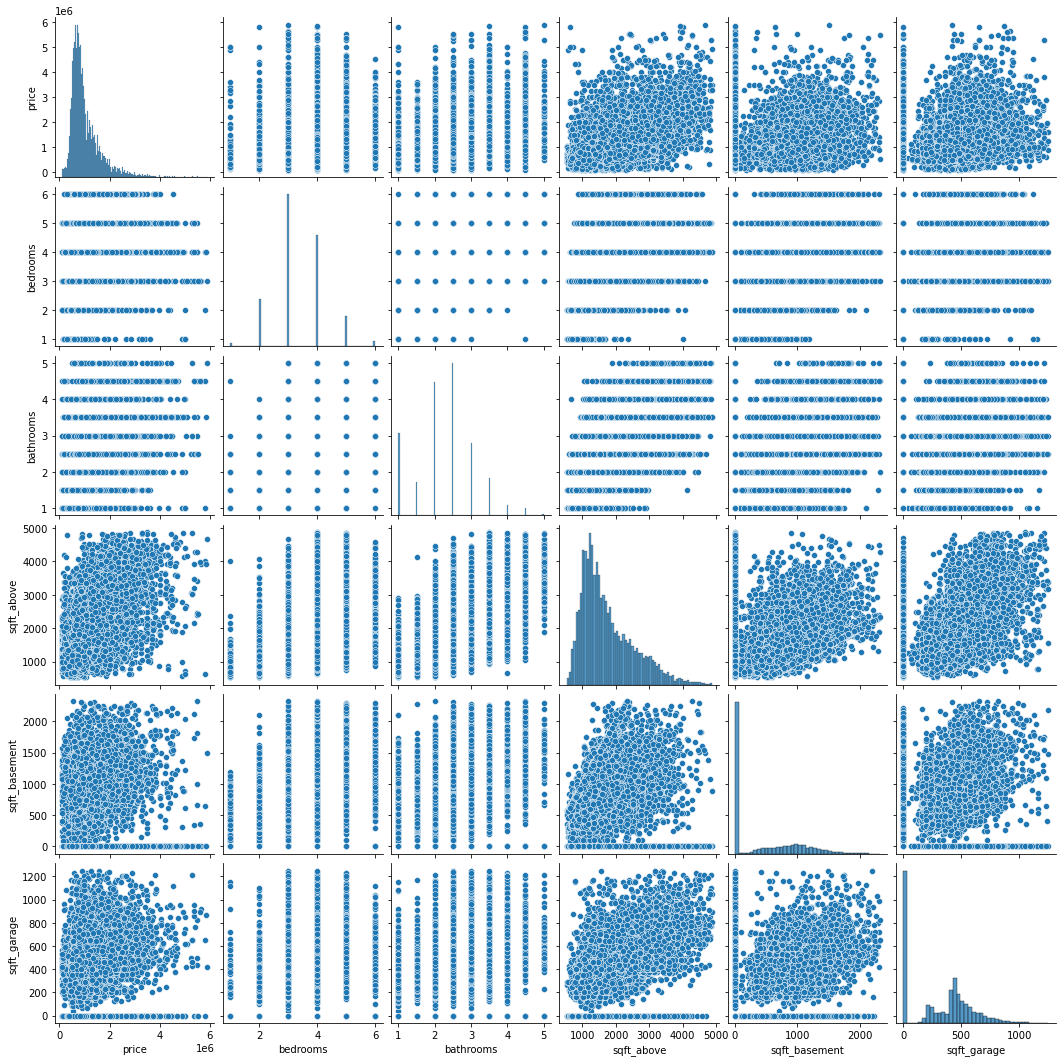

In [30]:
# Pair Plot Part 1

sns.pairplot(df.iloc[:,0:7]);

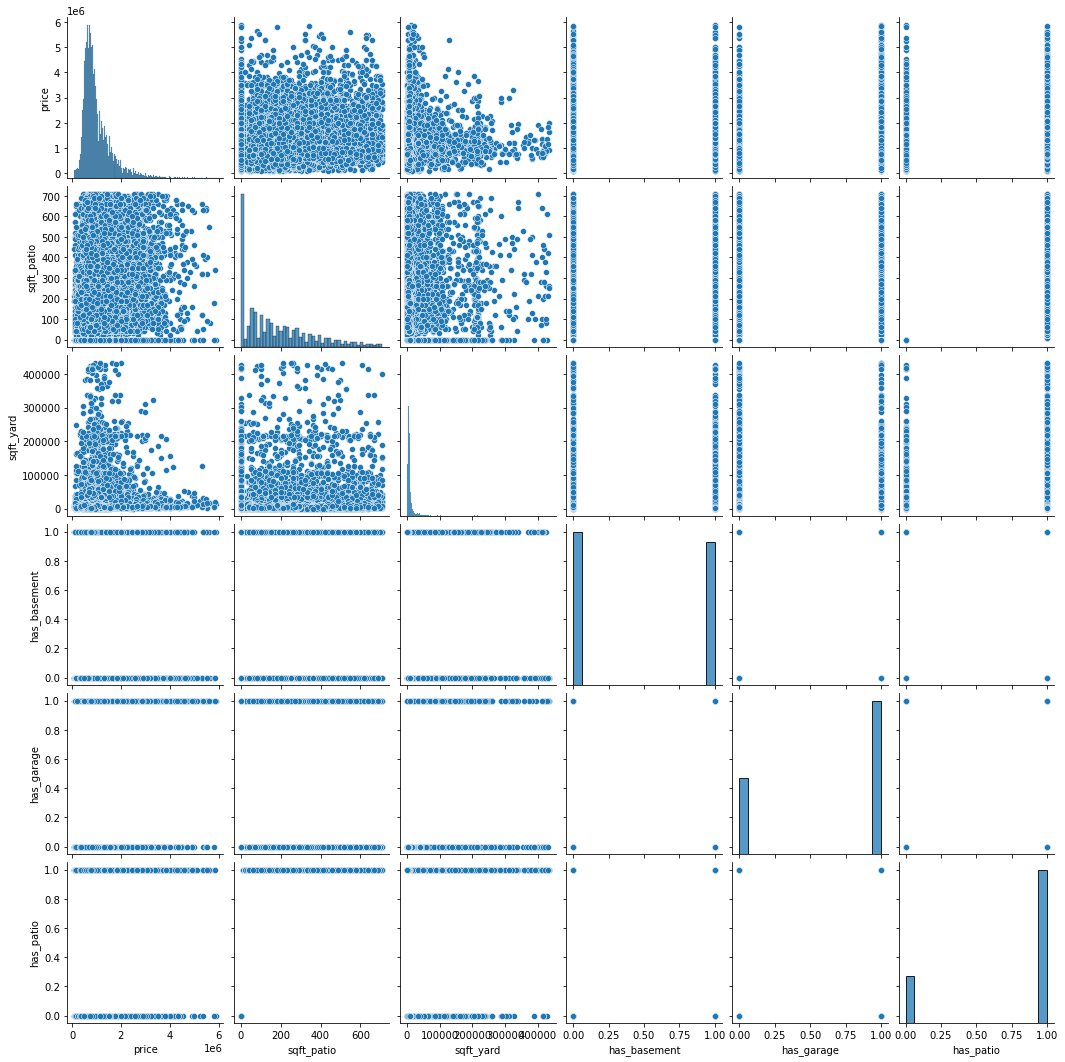

In [29]:
group2 = [0, 7, 8, 9, 10, 11]

sns.pairplot(df.iloc[:,group2]);

## Heat Map

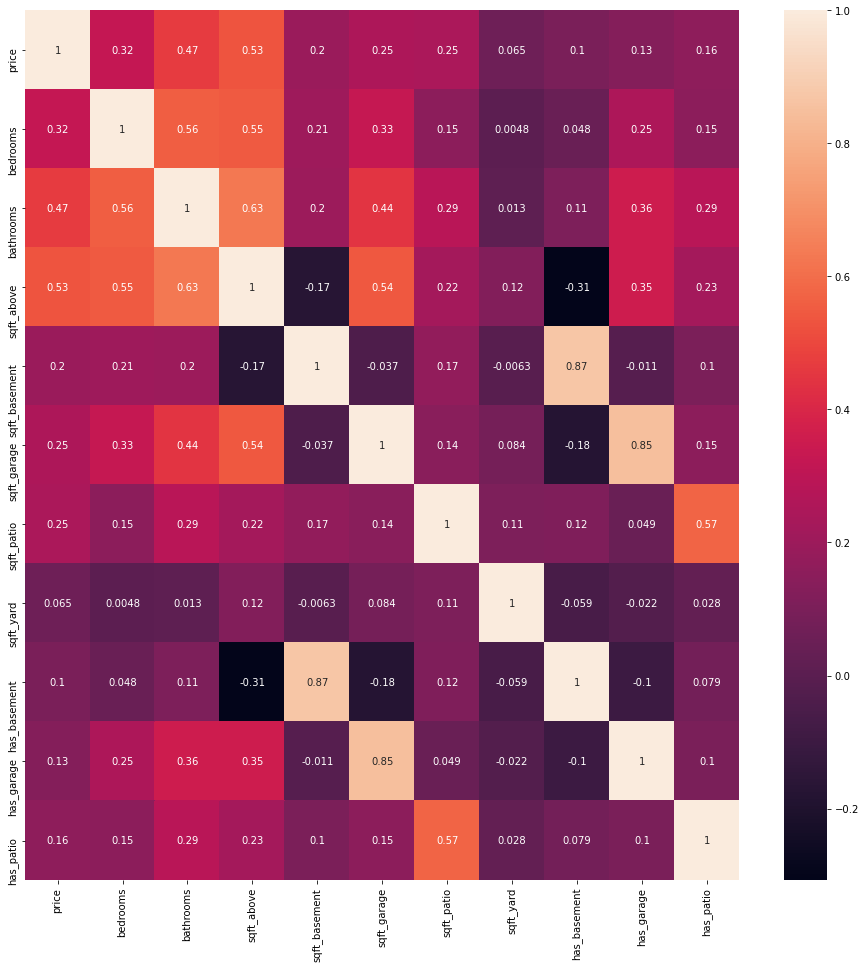

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot = True);

### Notes/Interpretations:

1. Relationships look murky: perhaps because most of the variables we are working with have wide, not normal distributions.

2. Highest correlation with price: sqft_above (r = 0.53), bathrooms (r = 0.47), bedrooms (r = 0.32)
* Not very promising r-values <br>
3. Possibility of multicollinearity: should be aware of that as we run & interpret model

# Modeling

## Model 1: Effect of Area of Home Spaces on Price

### Building Iterative Model: Effect of Area of Home Spaces on Price

**Question we are trying to answer:**
For which home space is *increased size* associated with *higher sale value?*
Which section of the house has the greatest positive relationship with sale value?

**Y:** <br>
price

**X:**  
sqft_above <br>
sqft_basement <br>
sqft_garage <br>
sqft_patio <br>
sqft_yard <br> 



#### Baseline Model - Price based on Above-Ground Living Area (Sq.Ft)

* For our baseline model, we decided to start with sqft_above, because:
    1. Highest correlation on heatmap
    2. Relevant to answering questions about area <br>  
<br>  
* Iterative models allow us to see the relative value that each location's area adds.

**4 Iterations:**
 1. Add sqft_basement
 2. Add sqft_garage
 3. Add sqft_patio
 4. Add sqft_yard

In [32]:
Y = df['price']
X1_base = sm.add_constant(df['sqft_above'])

model1_base = sm.OLS(Y,X_base).fit()
model1_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:06:37   Log-Likelihood:            -4.0784e+05
No. Observations:               27964   AIC:                         8.157e+05
Df Residuals:                   27962   BIC:                         8.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.856e+05   7696.941     37.108      0.000    2.71e+05    3.01e+05
sqft_above   426.4262      4.031    105.793      0.000     418.526     434.327
==============================================================================
Omnibus:                    11708.666   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87030.879
Skew:                           1.846   Prob(JB):                         0.00
Kurtosis:                      10.815   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. The model only explains 28% of the variance in sale price (R<sup>2</sup> = 0.28), which is small.

2. We need to test the assumptions of linear regression. It is highly likely our model fails these assumptions
 - High Condition Number, Kurtosis, Significant Omnibus, Durbin-Watson < 2 
 
* After building full model, we need to test assumptions of linearity and correct for failed assumptions

#### Iteration #1: Adding sqft_basement

For Iteration 1, we added sqft_basement to the model to see how much more of the variance in sale price is explained by basement area 

In [162]:
Y = df['price']
var = ['sqft_above', 'sqft_basement']
X1_it1 = sm.add_constant(df[var])

model1_it1 = sm.OLS(Y,X1_it1).fit()
model1_it1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8234.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:23:23   Log-Likelihood:            -4.0608e+05
No. Observations:               27964   AIC:                         8.122e+05
Df Residuals:                   27961   BIC:                         8.122e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.159e+04   8094.961      7.608      0.000    4.57e+04    7.75e+04
sqft_above      466.8535      3.841    121.552      0.000     459.325     474.382
sqft_basement   337.8395      5.504     61.386      0.000     327.052     348.627
==============================================================================
Omnibus:                    12045.305   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111904.236
Skew:                           1.831   Prob(JB):                         0.00
Kurtosis:                      12.090   Cond. No.                     5.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Iteration 1 Model vs. Baseline Model **
* R<sup>2</sup> = 0.371. Better, but not great.
* Basement Area contributes some to increased sale value, but not as much as Above-Ground Living Area
* Still problems with linear assumptions

#### Iteration #2: Adding sqft_ Garage

In [34]:
Y = df['price']
var = ['sqft_above', 'sqft_basement', 'sqft_garage']
X1_it2 = sm.add_constant(df[var])

model1_it2 = sm.OLS(Y,X1_it2).fit()
model1_it2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     5600.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:09:18   Log-Likelihood:            -4.0597e+05
No. Observations:               27964   AIC:                         8.120e+05
Df Residuals:                   27960   BIC:                         8.120e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.681e+04   8071.917      7.038      0.000     4.1e+04    7.26e+04
sqft_above      502.9224      4.571    110.032      0.000     493.964     511.881
sqft_basement   343.2112      5.496     62.449      0.000     332.439     353.983
sqft_garage    -190.8444     13.226    -14.430      0.000    -216.768    -164.921
==============================================================================
Omnibus:                    11975.224   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111889.313
Skew:                           1.816   Prob(JB):                         0.00
Kurtosis:                      12.102   Cond. No.                     5.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpreting Iteration 2 Model  vs. Iteration 1 Model**

* R<sup>2</sup> = 0.375.
* Garage Area contributes very little, basically nothing, to the model
    * Plus: negative coefficient implies that *less* garage space is associated with *higher sale price*

#### Iteration #3: Adding sqft_patio

In [210]:
var = ['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
X1_it3 = sm.add_constant(df[var])

model1_it3 = sm.OLS(Y,X1_it3).fit()
model1_it3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     4284.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:06:21   Log-Likelihood:            -4.0587e+05
No. Observations:               27964   AIC:                         8.117e+05
Df Residuals:                   27959   BIC:                         8.118e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.481e+04   8084.171      5.543      0.000     2.9e+04    6.07e+04
sqft_above      488.3601      4.663    104.736      0.000     479.221     497.499
sqft_basement   325.6677      5.607     58.081      0.000     314.678     336.658
sqft_garage    -192.9617     13.177    -14.643      0.000    -218.790    -167.133
sqft_patio      253.9232     17.486     14.521      0.000     219.649     288.198
==============================================================================
Omnibus:                    12004.277   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113873.442
Skew:                           1.816   Prob(JB):                         0.00
Kurtosis:                      12.194   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpreting Iteration 3 Model  vs. Iteration 2 Model**

* R<sup>2</sup> = 0.38.
* Like Garage Area, Patio Area contributes very little to sale price.

#### Iteration #4: Adding sqft_yard

In [206]:
var = ['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'sqft_yard']
X1_it4 = sm.add_constant(df[var])

model1_it4 = sm.OLS(Y,X1_it4).fit()
model1_it4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     3428.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:05:24   Log-Likelihood:            -4.0586e+05
No. Observations:               27964   AIC:                         8.117e+05
Df Residuals:                   27958   BIC:                         8.118e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.528e+04   8087.205      5.598      0.000    2.94e+04    6.11e+04
sqft_above      489.0448      4.675    104.599      0.000     479.881     498.209
sqft_basement   325.6206      5.607     58.076      0.000     314.631     336.610
sqft_garage    -192.4901     13.179    -14.606      0.000    -218.321    -166.659
sqft_patio      256.7654     17.545     14.635      0.000     222.377     291.154
sqft_yard        -0.1995      0.101     -1.974      0.048      -0.398      -0.001
==============================================================================
Omnibus:                    12019.183   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           114250.530
Skew:                           1.818   Prob(JB):                         0.00
Kurtosis:                      12.210   Cond. No.                     8.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpreting Iteration 3 Model  vs. Iteration 2 Model**

* R<sup>2</sup> = 0.38.
* Adding Yard Area to our model does not change R<sup>2</sup> at all
    * Coefficient of Yard Area is very small and negative coefficient
*It may be worth removing Yard Area from our final model.

### Testing Assumptions of Linear Regression

#### Assumption 1: Linearity

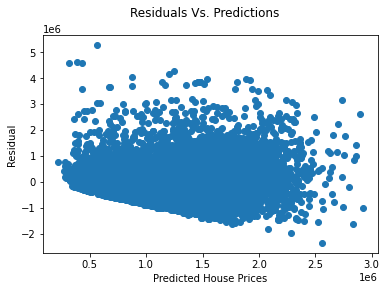

In [38]:
model1_preds = model1_it4.predict(X1_it4)
resids1 = Y - model1_preds

fig, ax = plt.subplots()

ax.scatter(model_preds1, resids1)
ax.set_xlabel('Predicted House Prices')
ax.set_ylabel('Residual')
plt.suptitle('Residuals Vs. Predictions');

**Fails Assumption 1**
 * No clear linear pattern in graph above

#### Assumption 2: Errors are Independent

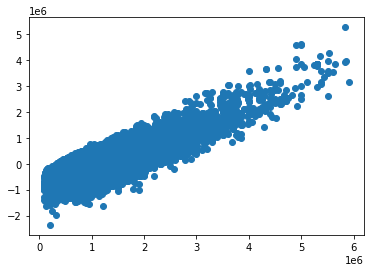

In [39]:
fig, ax = plt.subplots()

ax.scatter(Y, resids1);

In [40]:
#Confirming wtih durbin-watson

dw = sm.stats.stattools.durbin_watson

dw(resids)

print(f"{dw(resids):.2f} is less than 2, suggesting positive autocorrelation")

1.93 is less than 2, suggesting positive autocorrelation


**Fails Assumption 2**

* Errors are not independent
* Errors seem to have a linear pattern

#### Assumption 3: Errors are Normally Distributed

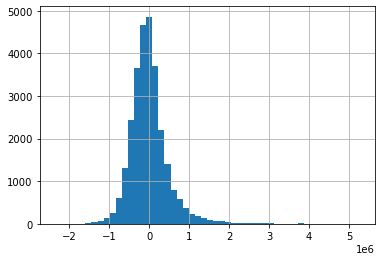

In [41]:
# Histogram of residuals

resids1.hist(bins=50);

* Slight skew right

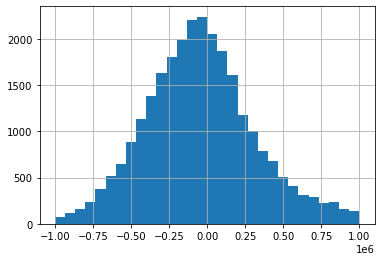

In [42]:
# Residuals histogram without outliers

resids1[abs(resids1) < 1e6].hist(bins=30);

* Normal-ish pattern with a slight skew right

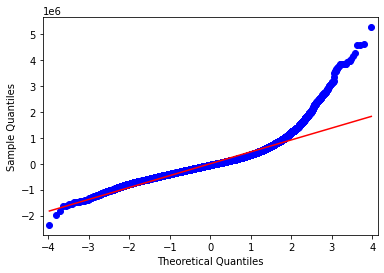

In [43]:
sm.qqplot(resids1, line='r');

* Highly Positively Skewed (1.846 > 1)
* significant omnibus test & Jarque-Bera test (p < 0.001).
* Kurtotic (10.815 > 3)

In [44]:
model1.summary().tables[2]

Omnibus:,12045.305,Durbin-Watson:,1.930
Prob(Omnibus):,0.000,Jarque-Bera (JB):,111904.236
Skew:,1.831,Prob(JB):,0.00
Kurtosis:,12.090,Cond. No.,5.39e+03


**Fails Assumption 3**
* Errors are not normally distributed

#### Assumption 4: Homoskedasticity

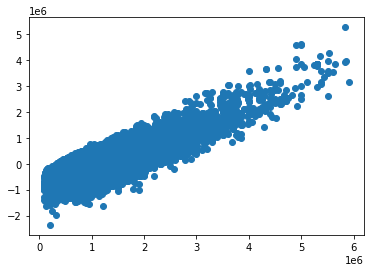

In [45]:
# Residuals graph kind of peters out towards top, which could indicate homoskedasticity

fig, ax = plt.subplots()

ax.scatter(Y, resids1);

In [46]:
# Test with Breusch-Pagan and Goldfeld-Quandt

p_breusch_pagan = sm.stats.diagnostic.het_breuschpagan(resids1, X1_it4)[1]
print(p_breusch_pagan)

if (p_breusch_pagan < 0.05):
    print("Reject null hypothesis (data is not homoskedastic)")


0.0
Reject null hypothesis (data is not homoskedastic)


**Fails Assumption 4**
* Data fails the assumption of homoskedasticity

#### Assumption 5: Multicollinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X1_it4.columns

vif_data["VIF"] = [variance_inflation_factor(X1_it4.values, i)
                          for i in range(len(X1_it4.columns))]

vif_data

,feature,VIF
0,const,7.727177
1,sqft_above,1.549746
2,sqft_basement,1.085453
3,sqft_garage,1.429356
4,sqft_patio,1.112421
5,sqft_yard,1.022831


* VIF < 5, which is in the acceptable range to assume lack of multicollinearity.

### Square Root  Transformed Model

* Failed tests 1-4

* We will try transforming the data to fix issues with the linear regression assumptions

* Heavy right skew: options = log transformation, square root, box cox

#### Transformation Options

* Data that is skewed right is most helped by *square root,* *cube root,* or *log transformations*

* Ideally, we should use the same transformation on all of our x variables so that coefficients are comparable.
    
* For X-variables:
    * Cannot use log with zero-value variables (log(0) = error)
    * First, try Square Root Transformation

In [163]:
Y_sqrt = np.sqrt(df['price'])
X1_sqrt = np.sqrt(df[var])
X1_sqrt = sm.add_constant(X1_sqrt)

model_1T = sm.OLS(Y_sqrt,X1_sqrt).fit()
model_1T.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     8435.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:34:17   Log-Likelihood:            -1.8943e+05
No. Observations:               27964   AIC:                         3.789e+05
Df Residuals:                   27961   BIC:                         3.789e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           148.6237      6.550     22.690      0.000     135.785     161.462
sqft_above       18.4068      0.148    124.547      0.000      18.117      18.696
sqft_basement     5.4243      0.083     65.158      0.000       5.261       5.587
==============================================================================
Omnibus:                     3768.678   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11611.530
Skew:                           0.707   Prob(JB):                         0.00
Kurtosis:                       5.822   Cond. No.                         229.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R<sup>2</sup>= 0.384, relatively steady
<br>  

* Lower condition number, skew is normal, kurtosis is better
* However, still significant omnibus & JB (data): errors are not normally distributed
* Durbin-Watson still under 2, positive autocorrelation
<br>  

* Downside = difficult to interpret what coefficients mean

* p(Sqft_Yard) > 0.05, can be removed from model

In [164]:
var.remove('sqft_yard')

ValueError: list.remove(x): x not in list

In [165]:
X1_it1_sqrt = np.sqrt(df[var])
X1_it1_sqrt = sm.add_constant(X1_it1_sqrt)

model_1T_it1 = sm.OLS(Y_sqrt,X2_sqrt).fit()
model_1T_it1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     4353.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:34:19   Log-Likelihood:            -1.8926e+05
No. Observations:               27964   AIC:                         3.785e+05
Df Residuals:                   27959   BIC:                         3.786e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           132.1118      6.661     19.832      0.000     119.055     145.169
sqft_above       18.9751      0.174    109.092      0.000      18.634      19.316
sqft_basement     5.2378      0.085     61.726      0.000       5.071       5.404
sqft_garage      -1.8878      0.136    -13.873      0.000      -2.155      -1.621
sqft_patio        2.0849      0.173     12.023      0.000       1.745       2.425
==============================================================================
Omnibus:                     3766.259   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11982.611
Skew:                           0.697   Prob(JB):                         0.00
Kurtosis:                       5.888   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing Assumptions for Square Root Transformed Model

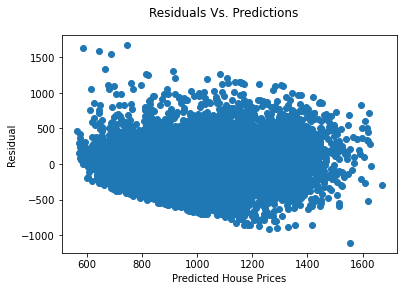

In [96]:
# 1. Linearity

model_preds_1T = model_1T_it1.predict(X1_it1_sqrt)
resids_1T = Y_sqrt - model_preds_1T

fig, ax = plt.subplots()

ax.scatter(model_preds_1T, resids)
ax.set_xlabel('Predicted House Prices')
ax.set_ylabel('Residual')
plt.suptitle('Residuals Vs. Predictions');

**1. Linearity Assumption**: still failed

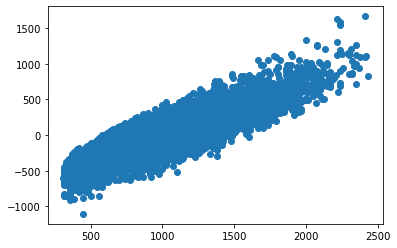

In [97]:
# 2. Errors are Independent

fig, ax = plt.subplots()

ax.scatter(Y_sqrt, resids_1T);

# durbin_watson = 1.97 < 2

**2. Independent Errors**: still failed

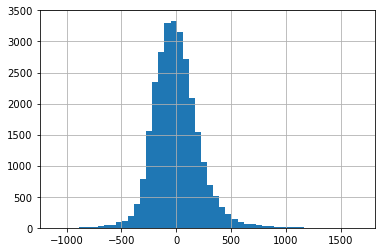

In [98]:
# 3. Normally Distributed Errors

resids_1T.hist(bins=50);

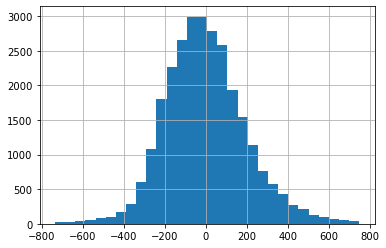

In [101]:
resids_1T[abs(resids_1T) < 750].hist(bins=30);

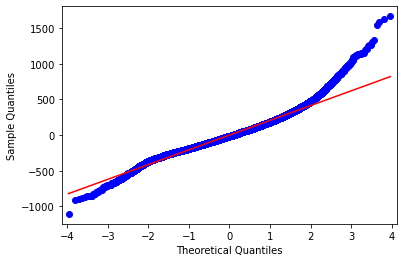

In [102]:
sm.qqplot(resids_1T, line='r');

* Residual Distribution looks normal based on histogram

* However, qq plot indicates skew right still

* Significant omnibus and JB

**Assumption 3**: Still failed

In [105]:
p_breusch_pagan = sm.stats.diagnostic.het_breuschpagan(resids_1T, X1_it1_sqrt)[1]
print(p_breusch_pagan)

if (p_breusch_pagan < 0.05):
    print("Reject null hypothesis (data is not homoskedastic)")

3.5109053049846384e-246
Reject null hypothesis (data is not homoskedastic)


**Assumption 4**: Still failed

### Conclusions from Model 1 Iterations and Transformations

* Transformed model fails same linear assumptions tests, even though it seems to improve the model.

* Transformed model corrects the condition number, but still fails linear assumptions, and makes coefficients harder to interpret

* We will proceed using the final untransformed models, remove sqft_yard & interpret with caution.

## Model 2: Effect of Grade on Price

### Dummy Code Grade

In [107]:
# Dummy Code Grade

dummy_grade = pd.get_dummies(df['grade'], drop_first=True)

dummy_grade

,Average,Above_Average,Exceptional
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
30150,0,1,0
30151,1,0,0
30152,1,0,0
30153,0,1,0


### Simple Linear Regression: Effect of Grade on Price

In [110]:
Y2 = df['price']
X2_base = sm.add_constant(dummy_grade)

model2_base = sm.OLS(Y2,X2_base).fit()
model2_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4384.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:21:54   Log-Likelihood:            -4.0716e+05
No. Observations:               27964   AIC:                         8.143e+05
Df Residuals:                   27960   BIC:                         8.144e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.288e+05   9162.027     68.633      0.000    6.11e+05    6.47e+05
Average         1.85e+05   1.03e+04     17.893      0.000    1.65e+05    2.05e+05
Above_Average  5.713e+05   1.03e+04     55.734      0.000    5.51e+05    5.91e+05
Exceptional    1.675e+06   1.71e+04     98.146      0.000    1.64e+06    1.71e+06
==============================================================================
Omnibus:                    12626.660   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107618.975
Skew:                           1.974   Prob(JB):                         0.00
Kurtosis:                      11.762   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R<sup>2</sup> = 0.32, fairly low but similar to Model 1

*Potential problems with model: significant omnibus & Jarque-Bera, DW < 2.

### Model 2 Final: Grade + Area on Price (Building off Model 1)

In [309]:
var = ['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
X2 = pd.concat([df[var], dummy_grade], axis=1)
X2

X2_w_const = sm.add_constant(X2)

model2_final = sm.OLS(Y,X2_w_const).fit()

model2_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     3196.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:50:43   Log-Likelihood:            -4.0433e+05
No. Observations:               27964   AIC:                         8.087e+05
Df Residuals:                   27956   BIC:                         8.087e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.867e+05   1.01e+04     18.472      0.000    1.67e+05    2.07e+05
sqft_above      346.4617      5.152     67.249      0.000     336.364     356.560
sqft_basement   280.4077      5.424     51.700      0.000     269.777     291.039
sqft_garage    -266.7689     12.760    -20.907      0.000    -291.779    -241.759
sqft_patio      155.9337     16.742      9.314      0.000     123.118     188.749
Average        4.359e+04   9794.416      4.451      0.000    2.44e+04    6.28e+04
Above_Average  2.423e+05   1.09e+04     22.301      0.000    2.21e+05    2.64e+05
Exceptional    9.675e+05   1.92e+04     50.444      0.000     9.3e+05    1.01e+06
==============================================================================
Omnibus:                    12682.418   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145528.793
Skew:                           1.880   Prob(JB):                         0.00
Kurtosis:                      13.524   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* R<sup>2</sup> = 0.45; stronger than Model 1 alone

* Significant effect of grade (p < 0.05) on price:  

* Model must be interpreted with caution due non-normally distributed values, but the advantage of this model over a transformed model is that we can directly interpret what the coefficients mean.

### Building graph for Section 5

In [332]:
model2_dict = {}
i = 1
while i < (len(model2.params.index)):
    model2_dict[model2.params.index[i]] = model2.params.values[i]
    i+=1

In [339]:
sqft_keys = ['sqft_above', 'sqft_basement', 'sqft_patio']
sqft_values = [model2_dict[key] for key in sqft_keys]
sqft_xlabel = ['Above Ground Living Area', 'Basement', 'Patio']
sqft_xaxis = 'Area of Home Spaces (in sq ft)'

grade_keys = ['Average', 'Above_Average', 'Exceptional']
grade_values = [model2_dict[key] for key in grade_keys]
grade_xlabel = ['Average', 'Above Average', 'Exceptional']
sqft_xaxis = 'Grade Level'

## Model 3: Housing Additions on Price

Housing Additions include:
   * Bedrooms (need dummy variable)
   * Bathrooms (need dummy variable)
   * Has_Patio
   * Has_Garage
   * Has_Basement

In [246]:
# Create Dummy Variables

dummy_bedrooms = pd.get_dummies(df['bedrooms'], drop_first=True)
dummy_bathrooms = pd.get_dummies(df['bathrooms'], drop_first=True)

,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30150,0,1,0,0,0,0,0,0
30151,0,1,0,0,0,0,0,0
30152,0,1,0,0,0,0,0,0
30153,0,0,1,0,0,0,0,0


Model 3a, 3b, and 3c will be built below and results will be interpreted in greater detail in Section 5.

### Model 3a: Housing Additions on Price (auxillary structures: patio, garage, basement)

In [249]:
add_var = ['has_patio', 'has_garage','has_basement']
X3 = pd.concat([df[add_var]], axis=1)
X3

X3_w_const = sm.add_constant(X3)

model3a = sm.OLS(Y,X3_w_const).fit()

model3a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     490.1
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.97e-310
Time:                        09:40:36   Log-Likelihood:            -4.1183e+05
No. Observations:               27964   AIC:                         8.237e+05
Df Residuals:                   27960   BIC:                         8.237e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.992e+05   9359.532     74.708      0.000    6.81e+05    7.18e+05
has_patio     2.055e+05   8579.043     23.955      0.000    1.89e+05    2.22e+05
has_garage    1.675e+05   7733.876     21.659      0.000    1.52e+05    1.83e+05
has_basement  1.272e+05   7273.517     17.494      0.000    1.13e+05    1.41e+05
==============================================================================
Omnibus:                    13360.694   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92491.408
Skew:                           2.205   Prob(JB):                         0.00
Kurtosis:                      10.742   Cond. No.                         5.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Model 3a accounted for 5% of the variance in house sale prices (R<sup>2</sup> = 0.05)
    * Since the R<sup>2</sup> value is so low, results should be interpreted with caution

* All of the coefficients had a significant effect in the model (p < 0.05):
    * Houses that had a basement were valued at a 12.7k higher selling price than houses that did not have a basement.
    * Houses with patios were valued at a 20.6k higher selling price than houses that did not have patios.
    * Houses with garages were valued at a 16.8k higher selling price than houses that did not have garages.

### Model 3b. Bedrooms

In [251]:
X3b = dummy_bedrooms
X3b_w_const = sm.add_constant(X3b)


model3b = sm.OLS(Y,X3b_w_const).fit()

model3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     697.3
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:40:49   Log-Likelihood:            -4.1091e+05
No. Observations:               27964   AIC:                         8.218e+05
Df Residuals:                   27958   BIC:                         8.219e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.821e+05   3.51e+04     22.260      0.000    7.13e+05    8.51e+05
2          -2.321e+04   3.64e+04     -0.638      0.524   -9.45e+04    4.81e+04
3           1.229e+05   3.55e+04      3.460      0.001    5.33e+04    1.93e+05
4           4.137e+05   3.57e+04     11.597      0.000    3.44e+05    4.84e+05
5           6.514e+05   3.71e+04     17.569      0.000    5.79e+05    7.24e+05
6           6.363e+05   4.55e+04     13.976      0.000    5.47e+05    7.26e+05
==============================================================================
Omnibus:                    13026.787   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95214.729
Skew:                           2.113   Prob(JB):                         0.00
Kurtosis:                      10.991   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Low R<sup>2</sup> (0.11)
* Not all coefficients significant

### Model 3c. Bathrooms

In [248]:
X3c = dummy_bathrooms
X3c_w_const = sm.add_constant(X3c)


model3c = sm.OLS(Y,X3c_w_const).fit()

model3c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     1143.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:40:06   Log-Likelihood:            -4.0859e+05
No. Observations:               27964   AIC:                         8.172e+05
Df Residuals:                   27955   BIC:                         8.173e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.918e+05   8117.403     85.224      0.000    6.76e+05    7.08e+05
1.5         8.676e+04   1.52e+04      5.722      0.000     5.7e+04    1.16e+05
2.0          1.87e+05   1.03e+04     18.110      0.000    1.67e+05    2.07e+05
2.5         3.585e+05   1.01e+04     35.550      0.000    3.39e+05    3.78e+05
3.0         5.281e+05   1.19e+04     44.375      0.000    5.05e+05    5.51e+05
3.5         9.054e+05   1.46e+04     62.192      0.000    8.77e+05    9.34e+05
4.0         1.066e+06   2.48e+04     42.965      0.000    1.02e+06    1.12e+06
4.5         1.706e+06   2.89e+04     58.971      0.000    1.65e+06    1.76e+06
5.0         1.541e+06   6.25e+04     24.670      0.000    1.42e+06    1.66e+06
==============================================================================
Omnibus:                    12169.710   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92914.495
Skew:                           1.925   Prob(JB):                         0.00
Kurtosis:                      11.057   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R<sup>2</sup> = 24.6%

* Steady pattern: increasing number of bathrooms increases house sale price

* Adding a half-bathroom or full bathroom contributes significantly to the variation in price
    * Adding a half-bathroom from 1 bathroom is associated with an 86.7k increase in price
    * Adding a full bathroom from 1 bathroom is associated with an 186k increase in price

In [ ]:
# Understanding coefficients further: 

coef_dict = {}
i = 0
while i < (len(model3c.params.index)):
    coef_dict[model3c.params.index[i]] = model3c.params.values[i]
    i+=1
    
coef_dict[2.5] - coef_dict[2]
coef_dict[3] - coef_dict[2]
coef_dict[3.5] - coef_dict[3]
coef_dict[4] - coef_dict[3]
coef_dict[4.5] - coef_dict[4]
coef_dict[5] - coef_dict[4]

# Results: Interpreting Final Models

* The final versions of Models 2 and 3 can be used to answer our business questions.

## Model 2: Final - Results

Model 2 addresses both of these questions:

* Question 1: Which *common house spaces* would *increased size* contribute to increased house prices? 

* Question 2: How much does *building quality* contribute to increased home prices? Is it worth adding renovation projects onto expansion projects?

***

* The features examined in Model 2 involved the size (square footage) of common house areas:
    * Sq. ft of Above Ground Living Area (sqft_above)
    * Sq. ft of Basement
    * Sq. ft Garage
    * Sq. ft Patio
    * Grade

**Model 2 Results Graphs**

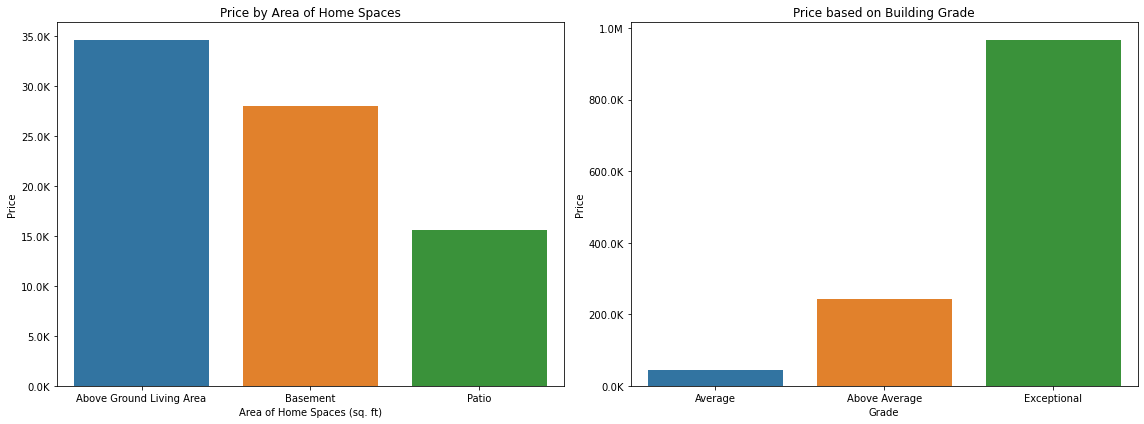

In [342]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
y = [value*100 for value in sqft_values]
sns.barplot(ax=ax[0], x=sqft_xlabel, y=y)
ax[0].set_title('Price by Area of Home Spaces')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Area of Home Spaces (sq. ft)')
ax[0].yaxis.set_major_formatter(format_number)


sns.barplot(ax=ax[1], x=grade_xlabel, y=grade_values)
ax[1].set_title('Price based on Building Grade')
ax[1].set_ylabel('Price')
ax[1].set_xlabel('Grade')
ax[1].yaxis.set_major_formatter(format_number)

plt.tight_layout()
plt.show()

**Results:**
* R<sup>2</sup> = 0.45, meaning that the current model explains 45% of the variance in house sale prices.

**Interpreting Coefficients:**
* Expanding the Above-Ground Living Space by 100 Sq Ft is estimated to increase sale prices by 34.6k
* Expanding the Basement space by 100 sq ft is estimated to increase sale prices by 28k
* Expanding one's Patio space by 100 sq ft is estimated to increase sale prices by 15.6k
<br>

* Expanding one's Garage space actually corresponds to *decreased* sale price by 26.7k
* Yard Space does not have a significant relationship with sale price
<br>  

* Improving the house's build quality from Below Average to Average is estimated to increase sale price by 43.5k
* Improving the house's build quality from Below Average to Above Average is estimated to increase sale price by 242.3k
* Improving the house's build quality from Below Average to Exceptional is estimated to increase sale price by 967.5k


## The advice that Home Remedies should give their clients, based on Model 2:

1. If clients want to optimally increase the sale value of their homes, the best expansion project would be to **expand above-ground living space** 
<br>  

2. Increasing basement space and increasing patio space are also valuable investments associated with increased sale value. Clients who have a preference for either of these two options can still increase the value of their home's sale price. 
<br>

3. It is not a wise idea for clients to expand garage space, as this is associated with *decreased* house value. It is also not wise for clients to increase yard space, as this only has a minor effect on sale price. Clients should be advised against expanding their yard space and garage space.

***

* For the typical homeowner, increasing build quality can significantly increase the house's sale value.
<br>

* Increasing the build quality of a home is a worthwhile project to combine with house expansion projects-- this is the best way a client to optimize getting the best value out of their construction investments.

## Model 3: Final - Results

Model 3 addresses Question 3:

* Question 3: Which room addition contributes to increased house sale value?

***

Features examined in Model 3: <br>

a. Whether or not these spaces were present in a house:
   * Has Garage (Yes/No)
   * Has Basement (Yes/No)
   * Has Patio (Yes/No)
   
b. The number of bedrooms in a house:
   * Number of Bedrooms
   
c. The number of bathrooms in a house:
   * Number of Bathrooms

### Model 3a: Auxillary House Additions & House Sale Price 

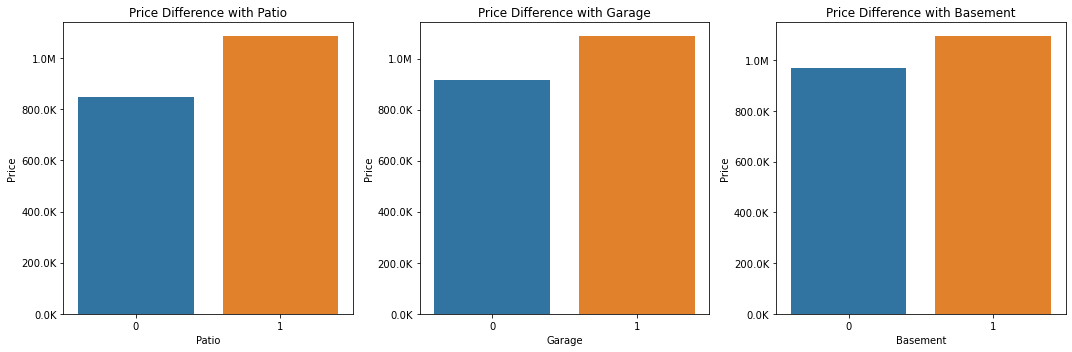

In [300]:
#Model 3a Graphs:

fig, ax = plt.subplots(1, 3, figsize=(15,5))
labels=['No', 'Yes']

sns.barplot(ax=ax[0], x='has_patio', y='price', data=df, ci=0)
ax[0].set_title('Price Difference with Patio')
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Patio')
ax[0].yaxis.set_major_formatter(format_number)


sns.barplot(ax=ax[1], x='has_garage', y='price', data=df, ci=0)
ax[1].set_title('Price Difference with Garage')
ax[1].set_ylabel('Price')
ax[1].set_xlabel('Garage')
ax[1].yaxis.set_major_formatter(format_number)

sns.barplot(ax=ax[2], x='has_basement', y='price', data=df, ci=0)
ax[2].set_title('Price Difference with Basement')
ax[2].set_ylabel('Price')
ax[2].set_xlabel('Basement')
ax[2].yaxis.set_major_formatter(format_number)

plt.tight_layout()
plt.show()

* Model 3a accounted for 5% of the variance in house sale prices (R<sup>2</sup> = 0.05)
    * Since the R<sup>2</sup> value is so low, results should be interpreted with caution


* All of the coefficients had a significant effect in the model (p < 0.05):
    * Houses with patios were valued at a 207k higher selling price than houses that did not have garages.
    * Houses with garages were valued at a 168k higher selling price than houses that did not have garages.
    * Houses that had a basement were valued at a 127k higher selling price than houses that did not have a basement.
    

### Model 3b: Number of Bedrooms & House Sale Price

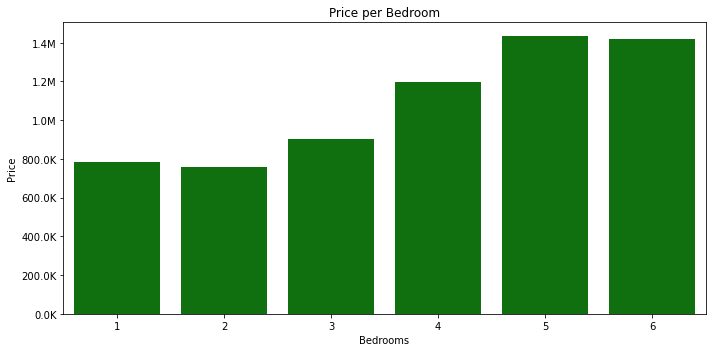

In [283]:
# Model 3b Graph

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='bedrooms', y='price', data=df, ci=0, color='green')
ax.set_title('Price per Bedroom')
ax.set_ylabel('Price')
ax.set_xlabel('Bedrooms')
ax.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.show()

* Model 3b accounts for 11% of the variance in sale prices (R<sup>2</sup> = 0.11).

* Coefficient interpretation:
    * Upgrading to 2 Bedrooms from 1 Bedroom does not seem to have a significant relationship with price (p = 0.524).
    * Upgrading to 3 Bedrooms from 1 Bedroom is estimated to increase house sale value by 123k
    * Upgrading to 4 Bedroms from 1 Bedroom is estimated to increase house sale value by 414k
    * Upgrading to 5 Bedrooms from 1 Bedroom is estimated to increase house sale value by 651k
    * Upgrading to 6 Bedrooms from 1 Bedroom is estimated to increase house sale value by 636k

### Model 3c: Number of Bathrooms and House Sale Price

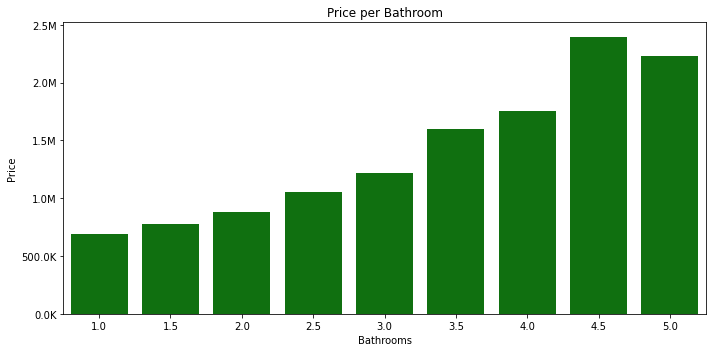

In [303]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='bathrooms', y='price', data=df, ci=0, color='green')
ax.set_title('Price per Bathroom')
ax.set_ylabel('Price')
ax.set_xlabel('Bathrooms')
ax.yaxis.set_major_formatter(format_number)
plt.tight_layout()
plt.show()

* Model accounts for 25% of the variance in price (R2 = 0.25)
<br>

* All of the coefficients had a significant effect in the model (p < 0.05):
    * Adding a half bathroom (1.5 Ba) to a 1 bathroom house is associated with an 86k increase in sale price
    * Adding a full bathroom (2 Ba) to a 1 bathroom house is associated with an 187k increase in sale price 
    <br>  
    
    * Adding a half bathroom (2.5 Ba) to a 2 bathroom house is associated with a 171k increase in price
    * Adding a full bathroom (3 Ba) to a 2 bathroom house is associated with a 341k increase in price 
    <br>  
    
    * Adding a half bathroom (3.5 Ba) to a 3 bathroom house is associated with a 377k increase in price
    * Adding a full bathroom (4 Ba) to a 3 bathroom house is associated with a 538k increase in price 
    <br>  
    
    * Adding a half bathroom (4.5 Ba) to a 4 bathroom house is associated with a 639k increase in price
    * Adding a full bathrom (5 Ba) to a 4 bathroom house is assocaited with a 474k increase in price 
    <br>  
    
    
* Returned value on investment steadily increases until 5 bathrooms, where it declines.  

## The advice that Home Remedies should give their clients, based on Model 3:

1. Adding a basement/patio/garage is estimated to significantly increase the sale value of a house, *if the house does not already have these spaces*
 * Clients interested in adding a garage would benefit from keeping it as small as possible.


2. Increasing basement space and increasing patio space are also valuable investments associated with increased sale value. Clients who have a preference for either of these two options can still increase the value of their home's sale price. 


3. It is not a wise idea for clients to expand garage space, as this is associated with *decreased* house value. Clients should be advised against expanding garage space.
<br>

4. Adding a bathroom has a stronger relationship (R<sup>2</sup> = 0.24 > 0.11) and generally offers stronger returns (based on coefficients) compared to adding a bedroom.
<br>

5. However, adding a bedroom is still a reasonable investment that is generally associated with higher sale price.

# Conclusions

## Summary of Recommendations for Home Remedies:

* Overall, our models support the benefit of home renovation on house sale prices.

* The following recommendations will help your clients make informed decisions on upgrading their houses to stay competitive in the real estate market.


**1. Expanding Existing Spaces**
<br>

1. Profitable Options:
    1. **Above-Ground Living Space**: \\$346 per square foot
    2. Basement Space: \\$280 per square foot
    3. Patio Space: \\$155 per square foot
    <br>  
    <br>

2. *Unprofitable* investments to *avoid*:
    1. **Garage**: <font color = red> Loss</font> of \\$266 per square foot
    2. **Yard**: weak association with sale price


**2. Renovation (Improving Build Quality)**
<br>

1. Profitable option to pair with space expansions
2. Also profitable on its own
3. Depending on current build quality, can estimate increase in price anywhere from $43k to $923k

**3. Adding Room/Home Spaces**

1. Adding half-bath or full bathroom: anywhere from \\$86k-639k increase in sale price
   * Max sale price increase is at 4.5 Bathrooms. Might not be worth upgrading to 5 Bathrooms.
   
<br>

2. Adding Bedrooms: anywhere from \\$123k to 650k increase *EXCEPT:*
    * Not Profitable to go from 1 Bedroom to 2 Bedrooms, or from 5 Bedrooms to 6 Bedrooms.
    
<br>

3. Adding Auxillary Spaces: <br>
    1. Patio Space: \\$207k increase <br>
    2. Garage : \\$168k increase <br>
    3. Basement: \\$127k increase <br>
 


## Limitations & Next Steps

1. Our models are limited by low R<sup>2</sup> values. None of our independent variables explained a significant portion of the variance in house sale price. 
    - This could be because of the high variability of both our outcome and predictor variables.
    - This limits our confidence in the value of the regression coefficients.
    - In the future, the variables that we excluded in the beginning could be incorporated in the models as control variable.
    
2. Value of sqft_yard is a rough estimate
    - The city of Seattle does not count garages/patios as part of sqft_lot, but that could be different in the suburbs
    - The fact that we had negative values, a physical impossibility, suggests that either the data is incorrect, or estimation method was flawed
    - Useful data for King County to consider including in the future